## Predictions using Decision Tree Algorithm
### GRIP july 2021
### The Sparks Foundation
### Kartikey Chhipa

## Importing the libraries

In [129]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [130]:
df = pd.read_csv('Iris.csv')

In [131]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Data Cleaning and preprocessing

In [133]:
df = df.drop(['Id'], axis= 1)

In [134]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [135]:
# Handling dependend categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [136]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## EDA

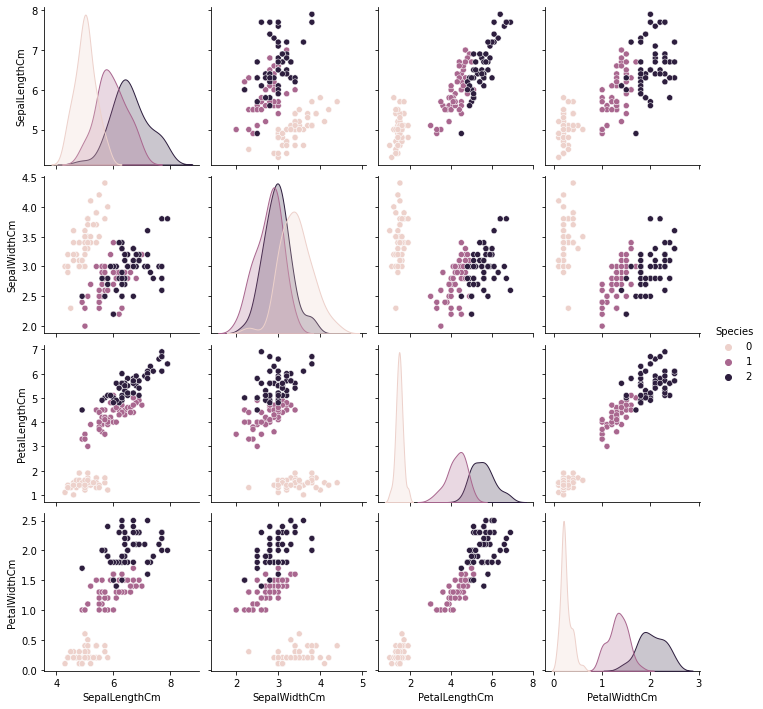

In [138]:
sns.pairplot(df.iloc[:,:],hue="Species", diag_kind="kde")

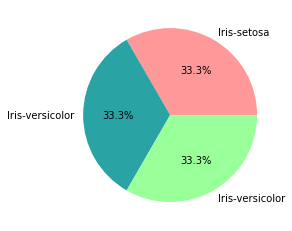

In [139]:
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor']
colors = ['#ff9999','#29a3a3','#99ff99']
plt.pie(df['Species'].value_counts(), labels=cn, colors=colors, autopct = '%1.1f%%')
plt.show()

## Splitting the dataset into the Training set and Test set

In [140]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size =0.2)
[x.shape for x in [X_train, y_train, X_test, y_test ]]

[(120, 4), (120, 1), (30, 4), (30, 1)]

## Training Decision Tree classifier on training sample

In [142]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

## Predicting the class using test sample

In [143]:
y_pred = classifier.predict(X_test)

In [144]:
print(y_pred)
le.inverse_transform(y_pred)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1]


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

## Model evaluation

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

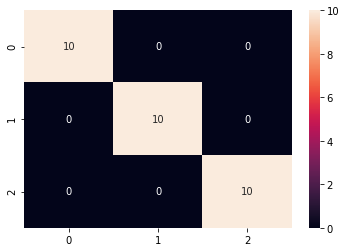

In [146]:
metrix = confusion_matrix(y_test, y_pred)
sns.heatmap(metrix, annot=True)

## Making single prediction

In [147]:
def predict_class(SepalLengthCm,SepalWidthCm, PetalLengthCm,PetalWidthCm):
    prediction = classifier.predict([[SepalLengthCm,SepalWidthCm, PetalLengthCm,PetalWidthCm]])
    return print(f' The class of the Flower is {(le.inverse_transform(prediction))[0]}')

predict_class(4.6,3.1,1.5,0.2)

 The class of the Flower is Iris-setosa


## Visualizing Decision Tree classifier

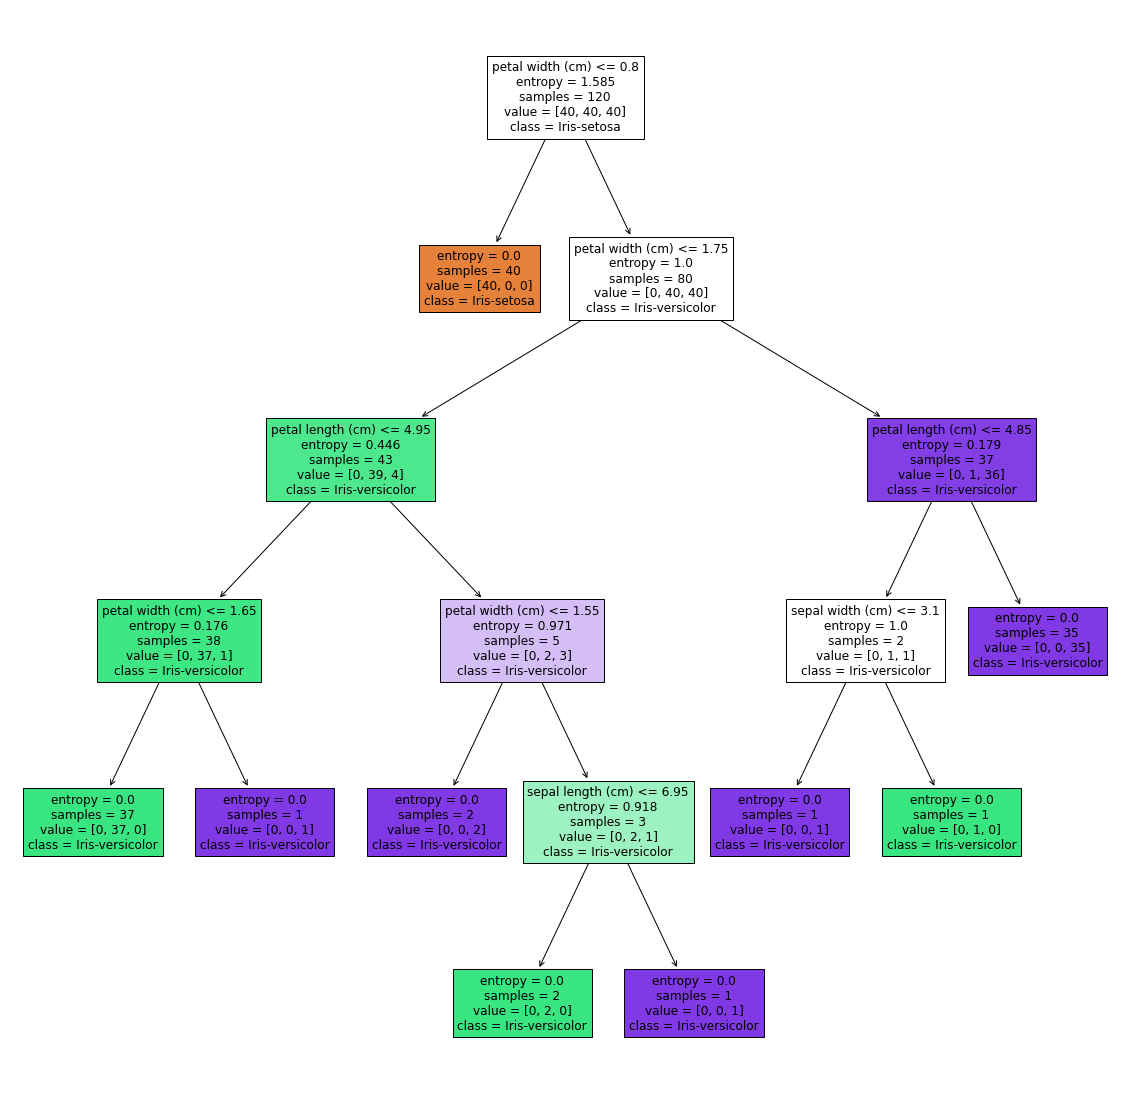

In [148]:
fig, ax = plt.subplots(figsize=(20,20))
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor']
tree.plot_tree(classifier,feature_names=fn , class_names =cn,ax=ax, filled = True);